In [5]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py
import tensorflow as tf
from imageio import imread
from PIL import Image
import os,cv2

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.applications.vgg16 import preprocess_input,decode_predictions
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [6]:
WIDTH=299
HEIGHT=299
BATCH_SIZE=64

In [ ]:
enc = OneHotEncoder(sparse=False)
categories = np.array(['geyser','glacier','sea','northern lights','road','mountain','people','waterfall']).reshape(8,1)
enc.fit_transform(categories)

In [24]:
# Open the HDF5 file
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input, decode_predictions

WIDTH=299
HEIGHT=299
BATCH_SIZE=64
test_dir = r'C:\Users\bg532fh\Documents\Personal\Kaggle\Vacation Destination\intel-image-classification\Dataset\test\\'
train_dir = r'C:\Users\bg532fh\Documents\Personal\Kaggle\Vacation Destination\intel-image-classification\Dataset\train\\'
val_dir = r'C:\Users\bg532fh\Documents\Personal\Kaggle\Vacation Destination\intel-image-classification\Dataset\val\\'

#Train DataSet Generator with Augmentation
print("\nTraining Data Set")
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
train_flow = train_generator.flow_from_directory(
    train_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size = BATCH_SIZE
)

#Validation DataSet Generator with Augmentation
print("\nValidation Data Set")
val_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
val_flow = val_generator.flow_from_directory(
    val_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size = BATCH_SIZE
)

#Test DataSet Generator with Augmentation
print("\nTest Data Set")
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_flow = test_generator.flow_from_directory(
    test_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size = BATCH_SIZE
)


Training Data Set
Found 13914 images belonging to 8 classes.

Validation Data Set
Found 1986 images belonging to 8 classes.

Test Data Set
Found 3982 images belonging to 8 classes.


In [ ]:
train_labels

In [13]:
train_shape = (13913,299,299,3)
test_shape = (3982,299,299,3)
val_shape = (1986,299,299,3)
train_addrs = []
test_addrs = []
val_addrs = []
train_labels = np.array([],dtype=str)
test_labels = np.array([],dtype=str)
val_labels = np.array([],dtype=str)
hdf5_path =  r"C:\Users\bg532fh\Documents\Personal\Kaggle\Vacation Destination\intel-image-classification\dataset.hdf5"
# open a hdf5 file and create earrays
hdf5_file = h5py.File(hdf5_path, mode='w')
hdf5_file.create_dataset("train_img", train_shape, np.int8)
hdf5_file.create_dataset("val_img", val_shape, np.int8)
hdf5_file.create_dataset("test_img", test_shape, np.int8)
train_path = r'C:\Users\bg532fh\Documents\Personal\Kaggle\Vacation Destination\intel-image-classification\Dataset\train\\'
for category_ in categories:
    cat = category_[0]
    cat_path = str(train_path)+str(cat)+'\*.png'
    cat_addrs = glob.glob(cat_path)
    train_labels = np.concatenate([train_labels,np.array([cat]*len(cat_addrs))],axis=0)
    train_addrs = np.concatenate([train_addrs,cat_addrs])
val_path = r'C:\Users\bg532fh\Documents\Personal\Kaggle\Vacation Destination\intel-image-classification\Dataset\val\\'
for category_ in categories:
    cat = category_[0]
    cat_path = str(val_path)+str(cat)+'\*.png'
    cat_addrs = glob.glob(cat_path)
    val_labels = np.concatenate([val_labels,np.array([cat]*len(cat_addrs))])
    val_addrs = np.concatenate([val_addrs,cat_addrs])
test_path = r'C:\Users\bg532fh\Documents\Personal\Kaggle\Vacation Destination\intel-image-classification\Dataset\test\\'
for category_ in categories:
    cat = category_[0]
    cat_path = str(test_path)+str(cat)+'\*.png'
    cat_addrs = glob.glob(cat_path)
    test_labels = np.concatenate([test_labels,np.array([cat]*len(cat_addrs))])
    test_addrs = np.concatenate([test_addrs,cat_addrs])
print((train_shape[0],1),np.string_([train_labels]).T.shape)
hdf5_file.create_dataset("train_labels",(train_shape[0],1),data=np.string_([train_labels]).T)
hdf5_file.create_dataset("val_labels", (val_shape[0],1), data=np.string_([val_labels]).T)
hdf5_file.create_dataset("test_labels", (test_shape[0],1), data=np.string_([test_labels]).T)
# print()
# loop over train addresses
for i in range(len(train_addrs)):
    # print how many images are saved every 1000 images
    if i % 1000 == 0 and i > 1:
        print('Train data: {}/{}'.format(i, len(train_addrs)))
    # read an image and resize to (224, 224)
    # cv2 load images as BGR, convert it to RGB
    addr = train_addrs[i]
    try:
        img = img_to_array(load_img(addr, target_size=(WIDTH,HEIGHT)))
    except Exception as e:
        print(addr)
        continue
    # add any image pre-processing here
    # save the image and calculate the mean so far
    hdf5_file["train_img"][i, ...] = img
# loop over validation addresses
for i in range(len(val_addrs)):
    # print how many images are saved every 1000 images
    if i % 1000 == 0 and i > 1:
        print('Validation data: {}/{}'.format(i, len(val_addrs)))
    # read an image and resize to (224, 224)
    # cv2 load images as BGR, convert it to RGB
    addr = val_addrs[i]
    try:
        img = img_to_array(load_img(addr, target_size=(WIDTH,HEIGHT)))
    except Exception as e:
        print(addr)
        continue    # add any image pre-processing here
    # if the data order is Theano, axis orders should change
    # save the image
    hdf5_file["val_img"][i, ...] = img
# loop over test addresses
for i in range(len(test_addrs)):
    # print how many images are saved every 1000 images
    if i % 1000 == 0 and i > 1:
        print('Test data: {}/{}'.format(i, len(test_addrs)))
    # read an image and resize to (224, 224)
    # cv2 load images as BGR, convert it to RGB
    addr = test_addrs[i]
    try:
        img = img_to_array(load_img(addr, target_size=(WIDTH,HEIGHT)))
    except Exception as e:
        print(addr)
        continue    # add any image pre-processing here
    # if the data order is Theano, axis orders should change
    # save the image
    hdf5_file["test_img"][i, ...] = img
# # save the mean and close the hdf5 file
# hdf5_file["train_mean"][...] = mean
hdf5_file.close()

(13913, 1) (13913, 1)
Train data: 1000/13913
Train data: 2000/13913
Train data: 3000/13913
Train data: 4000/13913
Train data: 5000/13913
Train data: 6000/13913
Train data: 7000/13913
Train data: 8000/13913
Train data: 9000/13913
Train data: 10000/13913
Train data: 11000/13913
Train data: 12000/13913
Train data: 13000/13913
Validation data: 1000/1986
Test data: 1000/3982
Test data: 2000/3982
Test data: 3000/3982


In [12]:
hdf5_file.close()

In [20]:
train_labels = enc.transform(train_labels.reshape(len(train_labels),1))
validation_labels = enc.transform(validation_labels.reshape(len(validation_labels),1))

In [7]:
#Train DataSet Generator with Augmentation
print("\nTraining Data Set")
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
train_flow = train_generator.flow(
    train_images, train_labels,
    batch_size = BATCH_SIZE
)

#Validation DataSet Generator with Augmentation
print("\nValidation Data Set")
val_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
val_flow = val_generator.flow(
    validation_images,validation_labels,
    batch_size = BATCH_SIZE
)


Training Data Set

Validation Data Set


In [8]:
from keras.models import Sequential, Model, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger
from keras import optimizers, models
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras import applications
from keras import backend as K
import tensorflow as tf
import os

NUM_PARALLEL_EXEC_UNITS = 8

#Set Performance Parameters for MKL and Tensorflow using Keras backend
#TensorFlow
config = tf.ConfigProto(
    intra_op_parallelism_threads=NUM_PARALLEL_EXEC_UNITS,
    inter_op_parallelism_threads=1
)

session = tf.Session(config=config)
K.set_session(session)

#MKL and OpenMP
os.environ["OMP_NUM_THREADS"] = str(NUM_PARALLEL_EXEC_UNITS)
os.environ["KMP_BLOCKTIME"] = "1"
os.environ["KMP_SETTINGS"] = "1"
os.environ["KMP_AFFINITY"]= "granularity=fine,verbose,compact,1,0"

In [14]:
# Initialize InceptionV3 with transfer learning
base_model = applications.InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(WIDTH, HEIGHT,3))

# add a global spatial average pooling layer
x = base_model.output

x = GlobalAveragePooling2D()(x)
# and a dense layer
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(categories), activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'], loss='categorical_crossentropy')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_189 (Conv2D)             (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_189 (BatchN (None, 149, 149, 32) 96          conv2d_189[0][0]                 
__________________________________________________________________________________________________
activation_189 (Activation)     (None, 149, 149, 32) 0           batch_normalization_189[0][0]    
__________________________________________________________________________________________________
conv2d_190

In [1]:
import math
top_layers_file_path="top_layers.iv3.hdf5"

checkpoint = ModelCheckpoint(top_layers_file_path, monitor='loss', verbose=1, save_best_only=True, mode='min')
tb = TensorBoard(log_dir='./logs', batch_size=val_flow.batch_size, write_graph=True, update_freq='batch')
early = EarlyStopping(monitor="loss", mode="min", patience=5)
csv_logger = CSVLogger('./logs/iv3-log.csv', append=True)

history = model.fit_generator(train_flow, 
                              epochs=5, 
                              verbose=1,
                              validation_data=val_flow,
                              validation_steps=math.ceil(validation_images.shape[0]/BATCH_SIZE),
                              steps_per_epoch=math.ceil(train_images.shape[0]/BATCH_SIZE),
                              callbacks=[checkpoint, early, tb, csv_logger])

In [ ]:
import math
import numpy as np
predictions = model.predict_generator(
    val_flow,
    verbose=1,
    steps=math.ceil(validation_images.shape[0]/BATCH_SIZE))
predicted_classes = enc.inverse_transform(predictions)
true_classes = enc.inverse_transform(validation_labels)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  
import scikitplot as skplt

# [print(k, ":", v) for k,v in enumerate(class_labels)]
# true_map_classes = [class_labels[x] for x in true_classes]
# predicted_map_classes = [class_labels[x] for x in predicted_classes]

skplt.metrics.plot_confusion_matrix(
    true_classes, 
    predicted_classes,
    labels=categories,
    x_tick_rotation=90,
    figsize=(12,12))

In [21]:
from keras.models import load_model
model = load_model('./image_classification_vgg_with_4_classes.h5')

In [22]:
instagram_images = []
instagram_loc = r"C:\Users\bg532fh\Documents\Personal\Kaggle\Vacation Destination\intel-image-classification\test_instagram\\"
for file in os.listdir(instagram_loc)[:500]:
    im1 = Image.open(instagram_loc+file)
    im2 = im1.resize((299, 299), Image.NEAREST)
    test_image = np.array(im2)
    instagram_images.append(test_image)

In [23]:
instagram_images = np.array(instagram_images)

In [24]:
predictions_enc = model.predict(instagram_images)
predictions_unenc = enc.inverse_transform(predictions_enc)

In [ ]:
predictions_unenc

In [25]:
# This function plots sample images in specified size and in defined grid
def plot_batch(images,labels, grid_width, grid_height, im_scale_x, im_scale_y):
    f, ax = plt.subplots(grid_width, grid_height)
    f.set_size_inches(15, 60)
    
    img_idx = 0
    for i in range(0, grid_width):
        for j in range(0, grid_height):
            ax[i][j].axis('off')
            ax[i][j].set_title(str(img_idx) + ". " + labels[img_idx][0])
            ax[i][j].imshow(array_to_img(images[img_idx]))
            img_idx += 1
            
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.25)

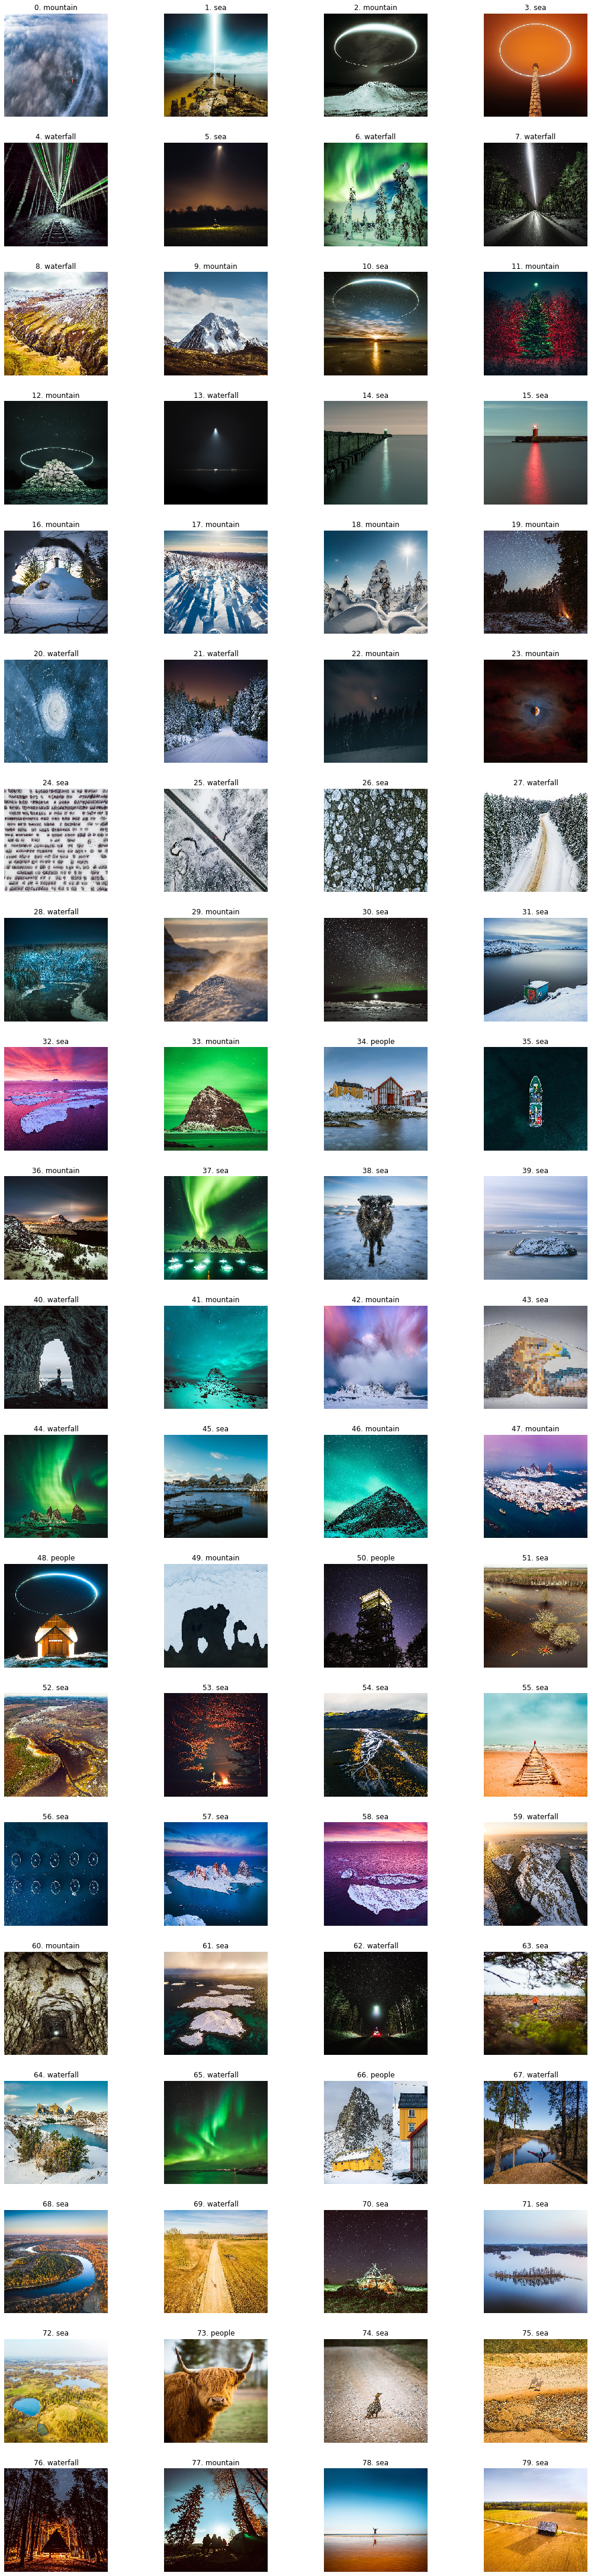

In [30]:
# load dataset and visualize sample data
plot_batch(instagram_images[400:500],predictions_unenc[400:500], grid_width=20, grid_height=4,
           im_scale_x=64, im_scale_y=64)

In [21]:
from vgg16_places_365 import VGG16_Places365
import os
import urllib3
import numpy as np
from PIL import Image
from cv2 import resize

In [37]:
instagram_images = []
instagram_loc = r"C:\Users\bg532fh\Documents\Personal\Kaggle\Vacation Destination\intel-image-classification\test_instagram\\"
for file in os.listdir(instagram_loc)[:500]:
    im1 = Image.open(instagram_loc+file)
    im2 = im1.resize((224, 224), Image.NEAREST)
    test_image = np.array(im2)
    instagram_images.append(test_image)

In [33]:
model = VGG16_Places365(weights='places')
predictions_to_return = 5

In [53]:
test_image = instagram_images[85]

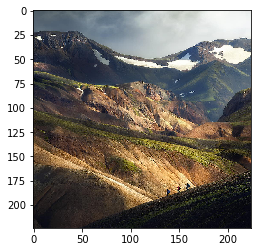

In [54]:
plt.imshow(test_image)

In [ ]:
# load the class label
file_name = r"C:\Users\bg532fh\Documents\Personal\Kaggle\Vacation Destination\intel-image-classification\vgg16_places_365\categories_places365.txt"
classes = list()
with open(file_name) as class_file:
    for line in class_file:
        classes.append(line.strip().split(' ')[0][3:])
classes = tuple(classes)

In [ ]:
preds = model.predict(np.array(instagram_images))

In [ ]:
preds